In [1]:
import numpy as np
import pandas as pd

# Створення власного набору даних для регресії
np.random.seed(42)
num_samples = 1000
num_features = 5

from sklearn.datasets import make_regression
X, y = make_regression(n_samples=num_samples, n_features=num_features, n_informative=3, noise=15, random_state=42)

# Збереження даних у файл
data = pd.DataFrame(np.column_stack([X, y]), columns=[f"Feature{i+1}" for i in range(num_features)] + ['Target'])
data.to_csv('regression_dataset.csv', index=False)


In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Зчитування даних з файлу
data = pd.read_csv('regression_dataset.csv')

# Розділення на ознаки та цільову змінну
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Розділення на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова базової моделі з трьома Dense шарами
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Компіляція та тренування моделі протягом 200 епох
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Оцінка ефективності базової моделі
train_loss = model.evaluate(X_train, y_train, verbose=0)
print("\nВтрати навчання (MAE) на тренувальних даних:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MAE) на тестових даних:", test_loss)




Epoch 1/200


25/25 [==============================] - 1s 8ms/step - loss: 44.8070 - mae: 44.8070 - val_loss: 43.3819 - val_mae: 43.3819
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 44.2499 - mae: 44.2499 - val_loss: 42.6210 - val_mae: 42.6210
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 43.2095 - mae: 43.2095 - val_loss: 41.2196 - val_mae: 41.2196
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 41.3239 - mae: 41.3239 - val_loss: 38.7786 - val_mae: 38.7786
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 38.1296 - mae: 38.1296 - val_loss: 34.8420 - val_mae: 34.8420
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 33.1744 - mae: 33.1744 - val_loss: 29.0387 - val_mae: 29.0387
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 26.2597 - mae: 26.2597 - val_loss: 21.8737 - val_mae: 21.8737
Epoch 8/200
25/25 [==============================]

In [3]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# Зчитування даних з файлу
data = pd.read_csv('regression_dataset.csv')

# Розділення на ознаки та цільову змінну
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Розділення на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова більшої моделі з чотирма Dense шарами
larger_model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Компіляція та тренування моделі протягом 200 епох
larger_model.compile(optimizer='adam', loss='mae', metrics=['mae'])
larger_history = larger_model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Оцінка ефективності більшої моделі
train_loss = larger_model.evaluate(X_train, y_train, verbose=0)
print("\nВтрати навчання (MAE) на тренувальних даних (більша модель):", train_loss)
test_loss = larger_model.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MAE) на тестових даних (більша модель):", test_loss)


Epoch 1/200
25/25 [==============================] - 1s 7ms/step - loss: 44.5935 - mae: 44.5935 - val_loss: 42.6684 - val_mae: 42.6684
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 40.5032 - mae: 40.5032 - val_loss: 33.2618 - val_mae: 33.2618
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 23.6283 - mae: 23.6283 - val_loss: 17.5566 - val_mae: 17.5566
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 14.6095 - mae: 14.6095 - val_loss: 13.4682 - val_mae: 13.4682
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 13.3450 - mae: 13.3450 - val_loss: 12.9340 - val_mae: 12.9340
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 12.8726 - mae: 12.8726 - val_loss: 12.7237 - val_mae: 12.7237
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 12.8508 - mae: 12.8508 - val_loss: 12.6458 - val_mae: 12.6458
Epoch 8/200
25/25 [==============================] - 0s

In [4]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# Зчитування даних з файлу
data = pd.read_csv('regression_dataset.csv')

# Розділення на ознаки та цільову змінну
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Розділення на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Збільшення кількості нейронів у кожному шарі
model_with_more_neurons = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Компіляція та тренування моделі протягом 200 епох
model_with_more_neurons.compile(optimizer='adam', loss='mae', metrics=['mae'])
more_neurons_history = model_with_more_neurons.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Оцінка ефективності моделі з більшою кількістю нейронів
train_loss_more_neurons = model_with_more_neurons.evaluate(X_train, y_train, verbose=0)
print("\nВтрати навчання (MAE) на тренувальних даних (більше нейрони):", train_loss_more_neurons)
test_loss_more_neurons = model_with_more_neurons.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MAE) на тестових даних (більше нейрони):", test_loss_more_neurons)


Epoch 1/200
25/25 [==============================] - 1s 9ms/step - loss: 44.5714 - mae: 44.5714 - val_loss: 42.6604 - val_mae: 42.6604
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 41.8088 - mae: 41.8088 - val_loss: 37.0770 - val_mae: 37.0770
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 30.6273 - mae: 30.6273 - val_loss: 19.7371 - val_mae: 19.7371
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 15.7717 - mae: 15.7717 - val_loss: 13.9099 - val_mae: 13.9099
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 13.2396 - mae: 13.2396 - val_loss: 13.9972 - val_mae: 13.9972
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 13.0636 - mae: 13.0636 - val_loss: 13.0018 - val_mae: 13.0018
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 12.6974 - mae: 12.6974 - val_loss: 13.2208 - val_mae: 13.2208
Epoch 8/200
25/25 [==============================] - 0s

In [5]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd

# Зчитування даних з файлу
data = pd.read_csv('regression_dataset.csv')

# Розділення на ознаки та цільову змінну
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Розділення на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Збільшення параметра learning_rate в 10 разів
larger_learning_rate_model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Компіляція та тренування моделі протягом 200 епох з новим learning_rate
larger_learning_rate_model.compile(optimizer=Adam(learning_rate=0.01), loss='mae', metrics=['mae'])
larger_learning_rate_history = larger_learning_rate_model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Оцінка ефективності моделі з більшим learning_rate
train_loss_larger_lr = larger_learning_rate_model.evaluate(X_train, y_train, verbose=0)
print("\nВтрати навчання (MAE) на тренувальних даних (більший learning_rate):", train_loss_larger_lr)
test_loss_larger_lr = larger_learning_rate_model.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MAE) на тестових даних (більший learning_rate):", test_loss_larger_lr)


Epoch 1/200
25/25 [==============================] - 1s 9ms/step - loss: 38.1455 - mae: 38.1455 - val_loss: 21.7924 - val_mae: 21.7924
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 15.4911 - mae: 15.4911 - val_loss: 14.0325 - val_mae: 14.0325
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 13.4945 - mae: 13.4945 - val_loss: 13.8232 - val_mae: 13.8232
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 12.9481 - mae: 12.9481 - val_loss: 13.8577 - val_mae: 13.8577
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 13.0969 - mae: 13.0969 - val_loss: 13.0488 - val_mae: 13.0488
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 12.7464 - mae: 12.7464 - val_loss: 12.8948 - val_mae: 12.8948
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 12.5250 - mae: 12.5250 - val_loss: 12.8223 - val_mae: 12.8223
Epoch 8/200
25/25 [==============================] - 0s

In [6]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# Зчитування даних з файлу
data = pd.read_csv('regression_dataset.csv')

# Розділення на ознаки та цільову змінну
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Розділення на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель з трьома Dense шарами
model_300_epochs = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Компіляція та тренування моделі протягом 300 епох
model_300_epochs.compile(optimizer='adam', loss='mae', metrics=['mae'])
history_300_epochs = model_300_epochs.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

# Оцінка ефективності моделі з тривалішим тренуванням
train_loss_300_epochs = model_300_epochs.evaluate(X_train, y_train, verbose=0)
print("\nВтрати навчання (MAE) на тренувальних даних (300 епох):", train_loss_300_epochs)
test_loss_300_epochs = model_300_epochs.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MAE) на тестових даних (300 епох):", test_loss_300_epochs)


Epoch 1/300
25/25 [==============================] - 1s 7ms/step - loss: 44.8335 - mae: 44.8335 - val_loss: 43.4585 - val_mae: 43.4585
Epoch 2/300
25/25 [==============================] - 0s 2ms/step - loss: 44.3641 - mae: 44.3641 - val_loss: 42.8560 - val_mae: 42.8560
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 43.5183 - mae: 43.5183 - val_loss: 41.6650 - val_mae: 41.6650
Epoch 4/300
25/25 [==============================] - 0s 2ms/step - loss: 41.8584 - mae: 41.8584 - val_loss: 39.5090 - val_mae: 39.5090
Epoch 5/300
25/25 [==============================] - 0s 2ms/step - loss: 38.9858 - mae: 38.9858 - val_loss: 35.8712 - val_mae: 35.8712
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 34.4326 - mae: 34.4326 - val_loss: 30.5335 - val_mae: 30.5335
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 28.0577 - mae: 28.0577 - val_loss: 24.2253 - val_mae: 24.2253
Epoch 8/300
25/25 [==============================] - 0s

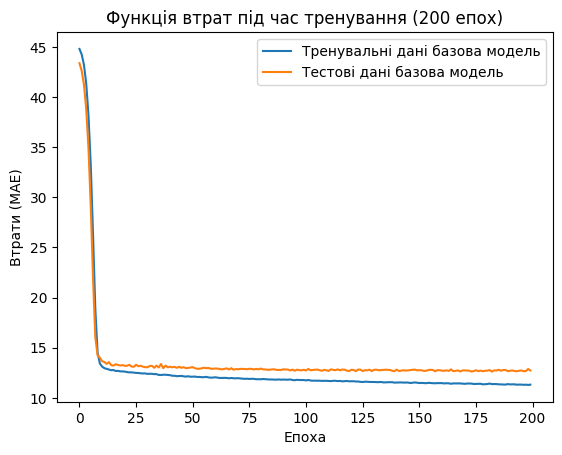

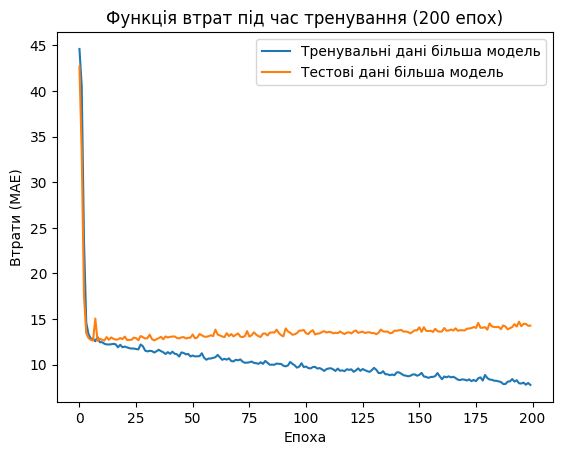

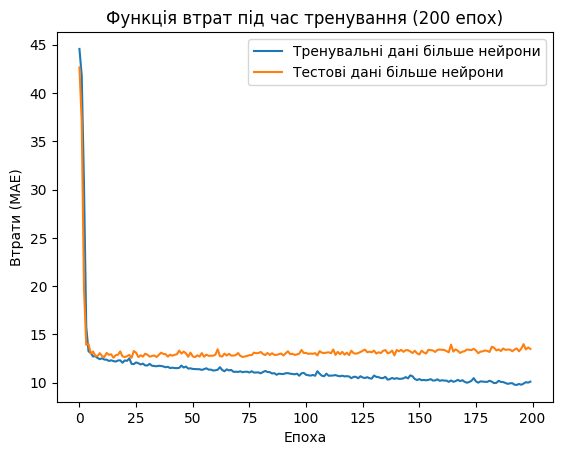

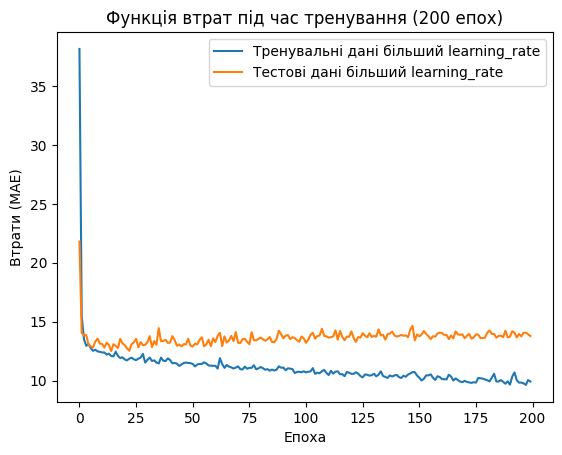

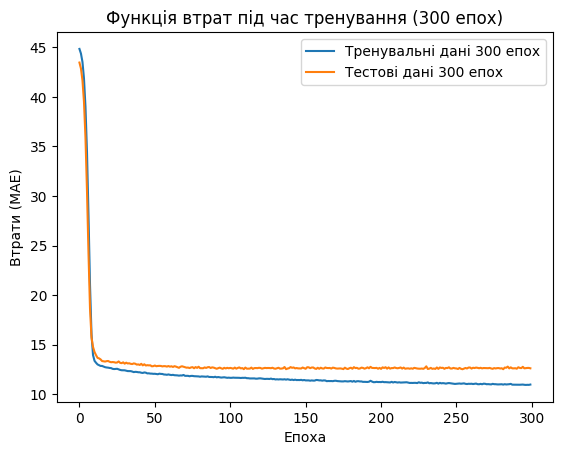

In [7]:
import matplotlib.pyplot as plt

# Визначимо функцію для побудови графіка
def plot_loss(history, label, n_epochs):
    plt.plot(history.history['loss'], label='Тренувальні дані ' + label)
    plt.plot(history.history['val_loss'], label='Тестові дані ' + label)
    plt.title('Функція втрат під час тренування (' + str(n_epochs) + ' епох)')
    plt.xlabel('Епоха')
    plt.ylabel('Втрати (MAE)')
    plt.legend()
    plt.show()

# Графік для базової моделі (200 епох)
plot_loss(history, 'базова модель', 200)

# Графік для більшої моделі (200 епох)
plot_loss(larger_history, 'більша модель', 200)

# Графік для моделі з більшою кількістю нейронів (200 епох)
plot_loss(more_neurons_history, 'більше нейрони', 200)

# Графік для моделі з більшим learning_rate (200 епох)
plot_loss(larger_learning_rate_history, 'більший learning_rate', 200)

# Графік для моделі з тривалішим тренуванням (300 епох)
plot_loss(history_300_epochs, '300 епох', 300)
